<a href="https://colab.research.google.com/github/Sphumelel/Sphumelel/blob/main/STIs_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from IPython import get_ipython
from IPython.display import display
#%%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv('/content/STIs_Patient_Dataset.csv',on_bad_lines='skip')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, P001;24;M;Painful urination to P100;24;F;Genital ulcers with rolled edges;Granuloma Inguinale (Donovanosis)
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Patient ID;Age;Sex;Symptoms;Probable Diagnosis  80 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB
None


In [7]:
print(df.head())

                                        Patient ID;Age;Sex;Symptoms;Probable Diagnosis
P001;24;M;Painful urination                                 yellow discharge;Gonorrhea
P002;30;F;Painless sore on genitals         no other symptoms;Syphilis (Primary Stage)
P003;28;M;Genital sores                                  swollen lymph nodes;Chancroid
P004;19;F;Frothy yellow-green discharge                 vaginal itching;Trichomoniasis
P005;34;M;Flu-like symptoms                      swollen lymph nodes;HIV (Acute Stage)


In [8]:
# Try different encodings
for encoding in ['utf-8', 'latin-1', 'iso-8859-1']:
    try:
        # Specify the delimiter as semicolon
        df = pd.read_csv('STIs_Patient_Dataset.csv', encoding=encoding, on_bad_lines='skip', delimiter=';')
        if 'Probable Diagnosis' in df.columns:
            print(f"CSV file loaded successfully with encoding: {encoding}")
            break  # Stop if the column is found
    except UnicodeDecodeError:
        print(f"Decoding error with encoding: {encoding}")
    except pd.errors.ParserError as e:
        print(f"Error reading CSV file with encoding: {encoding} - {e}")

# If the column is still not found, investigate the header row:
if 'Probable Diagnosis' not in df.columns:
    print("Column 'Probable Diagnosis' not found. Checking header for issues...")
    with open('STIs_Patient_Dataset.csv', 'r', encoding='utf-8') as file:
        header = file.readline().strip()
        print(f"Header row: {header}")  # Examine the header
        columns = header.split(',')
        # Try removing leading/trailing spaces and special characters
        cleaned_columns = [col.strip().replace('\ufeff', '') for col in columns]
        df = pd.read_csv('STIs_Patient_Dataset.csv', names=cleaned_columns, skiprows=1)

# Double-check if the column is now present:
if 'Probable Diagnosis' in df.columns:
    print("Column 'Probable Diagnosis' found after cleaning!")
else:
    print("Column 'Probable Diagnosis' still missing! Please examine the CSV file further.")

print(df.info())
print(df.head())

CSV file loaded successfully with encoding: utf-8
Column 'Probable Diagnosis' found after cleaning!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient ID          100 non-null    object
 1   Age                 100 non-null    int64 
 2   Sex                 100 non-null    object
 3   Symptoms            100 non-null    object
 4   Probable Diagnosis  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB
None
  Patient ID  Age Sex                                        Symptoms  \
0       P001   24   M             Painful urination, yellow discharge   
1       P002   30   F    Painless sore on genitals, no other symptoms   
2       P003   28   M              Genital sores, swollen lymph nodes   
3       P004   19   F  Frothy yellow-green discharge, vaginal itching   
4       P005   34   M          Flu-like s

In [12]:
# Assuming df is your loaded DataFrame
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# define x using the selected features
x = df[numerical_features.tolist() + categorical_features.tolist()]

In [13]:
numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [14]:
categorical_features = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_features, categorical_features)
    ])

In [16]:
#split the dataset
# numerical_features and categorical_features should be defined using df, not x
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

x = df[numerical_features.tolist() + categorical_features.tolist()]  # Select features for x, converting Index to list
y = df['Probable Diagnosis']  # Assuming 'Probable Diagnosis' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
#creating a full pipeline: preprocessing+classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [18]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame
# ... (Your code to load and clean the DataFrame) ...

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[  # Changed variable name here
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define numerical and categorical features using df
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)  # Use categorical_transformer here
    ])

# Split the dataset
x = df[numerical_features.tolist() + categorical_features.tolist()]
y = df['Probable Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Patient ID', 'Sex', 'Symptoms', 'Probable Diagnosis'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [20]:
y_pred=model_pipeline.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                                    precision    recall  f1-score   support

                        Chancroid       1.00      1.00      1.00         1
                        Chlamydia       1.00      1.00      1.00         1
                        Gonorrhea       1.00      1.00      1.00         2
Granuloma Inguinale (Donovanosis)       1.00      1.00      1.00         1
                HIV (Acute Stage)       1.00      1.00      1.00         2
                              HPV       1.00      1.00      1.00         1
   Lymphogranuloma Venereum (LGV)       1.00      1.00      1.00         3
            Molluscum Contagiosum       1.00      1.00      1.00         4
            Mycoplasma Genitalium       1.00      1.00      1.00         2
                          Scabies       1.00      1.00      1.00         1
     Shigella (Enteric Infection)       1.00      1.00      1.00         1
                   Trichomoniasis       1.00      1.00      

In [23]:
!pip install seaborn
import seaborn as sns # Import seaborn with the alias 'sns'
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

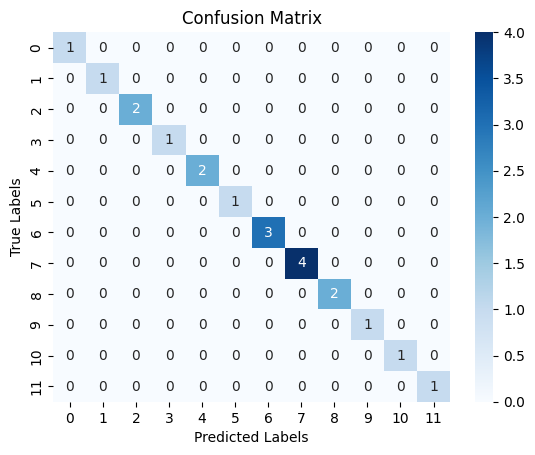

In [24]:
#visualization confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

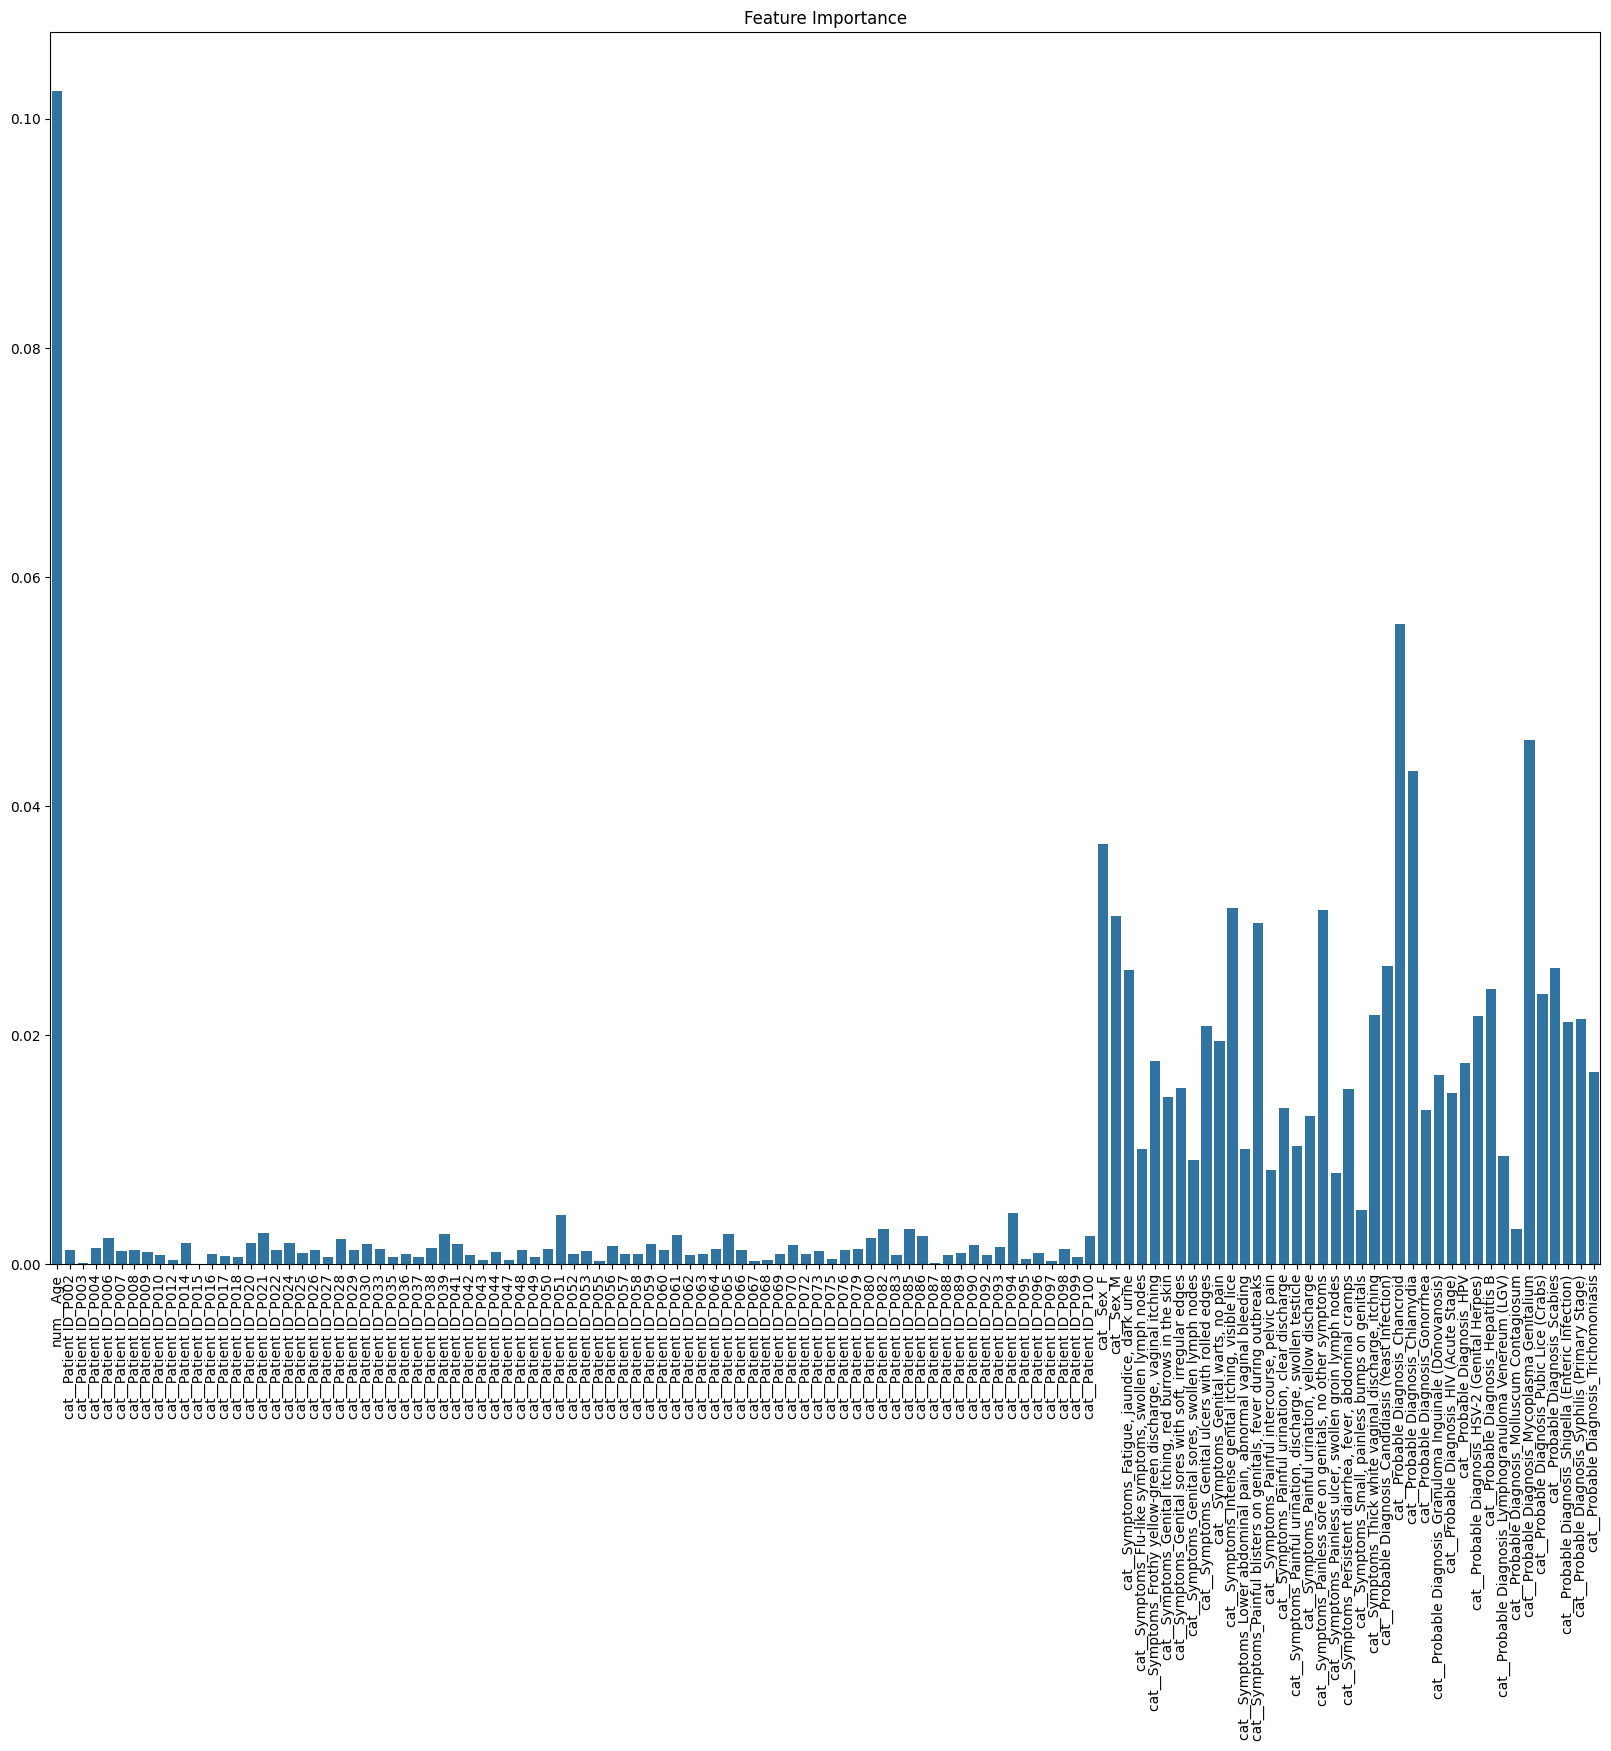

In [29]:
#feature importance
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=x_train.columns)

plt.figure(figsize=(20, 16))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [32]:
#Initialize models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [34]:
from sklearn.model_selection import cross_val_score

In [37]:
#Train and Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    # Create a pipeline for each model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])  # Use the model from the loop

    # Perform cross-validation (5-fold CV) using the pipeline
    cv_scores = cross_val_score(model_pipeline, x_train, y_train, cv=5, scoring='accuracy')

    # Store the results (mean CV score)
    results[model_name] = cv_scores.mean()

    # Fit the model pipeline on the entire training data
    model_pipeline.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(x_test)

    # Output performance metrics for each model
    print(f"\n{model_name} - Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Logistic Regression - Performance Metrics:
Accuracy: 1.0000
                                   precision    recall  f1-score   support

                        Chancroid       1.00      1.00      1.00         1
                        Chlamydia       1.00      1.00      1.00         1
                        Gonorrhea       1.00      1.00      1.00         2
Granuloma Inguinale (Donovanosis)       1.00      1.00      1.00         1
                HIV (Acute Stage)       1.00      1.00      1.00         2
                              HPV       1.00      1.00      1.00         1
   Lymphogranuloma Venereum (LGV)       1.00      1.00      1.00         3
            Molluscum Contagiosum       1.00      1.00      1.00         4
            Mycoplasma Genitalium       1.00      1.00      1.00         2
                          Scabies       1.00      1.00      1.00         1
     Shigella (Enteric Infection)       1.00      1.00      1.00         1
                   Trichomoniasis     

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Random Forest - Performance Metrics:
Accuracy: 1.0000
                                   precision    recall  f1-score   support

                        Chancroid       1.00      1.00      1.00         1
                        Chlamydia       1.00      1.00      1.00         1
                        Gonorrhea       1.00      1.00      1.00         2
Granuloma Inguinale (Donovanosis)       1.00      1.00      1.00         1
                HIV (Acute Stage)       1.00      1.00      1.00         2
                              HPV       1.00      1.00      1.00         1
   Lymphogranuloma Venereum (LGV)       1.00      1.00      1.00         3
            Molluscum Contagiosum       1.00      1.00      1.00         4
            Mycoplasma Genitalium       1.00      1.00      1.00         2
                          Scabies       1.00      1.00      1.00         1
     Shigella (Enteric Infection)       1.00      1.00      1.00         1
                   Trichomoniasis       1.00

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Support Vector Machine - Performance Metrics:
Accuracy: 0.8000
                                   precision    recall  f1-score   support

                        Chancroid       1.00      1.00      1.00         1
                        Chlamydia       0.20      1.00      0.33         1
                        Gonorrhea       1.00      1.00      1.00         2
Granuloma Inguinale (Donovanosis)       1.00      1.00      1.00         1
                HIV (Acute Stage)       1.00      1.00      1.00         2
                              HPV       1.00      1.00      1.00         1
   Lymphogranuloma Venereum (LGV)       1.00      1.00      1.00         3
            Molluscum Contagiosum       0.00      0.00      0.00         4
            Mycoplasma Genitalium       1.00      1.00      1.00         2
                          Scabies       1.00      1.00      1.00         1
     Shigella (Enteric Infection)       1.00      1.00      1.00         1
                   Trichomoniasis  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


K-Nearest Neighbors - Performance Metrics:
Accuracy: 0.6500
                                   precision    recall  f1-score   support

                        Chancroid       1.00      1.00      1.00         1
                        Chlamydia       1.00      1.00      1.00         1
                        Gonorrhea       0.33      1.00      0.50         2
Granuloma Inguinale (Donovanosis)       1.00      1.00      1.00         1
                HIV (Acute Stage)       1.00      1.00      1.00         2
                              HPV       1.00      1.00      1.00         1
   Lymphogranuloma Venereum (LGV)       0.00      0.00      0.00         3
            Molluscum Contagiosum       0.00      0.00      0.00         4
            Mycoplasma Genitalium       1.00      1.00      1.00         2
                          Scabies       1.00      1.00      1.00         1
     Shigella (Enteric Infection)       1.00      1.00      1.00         1
                   Trichomoniasis     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# Compare model performances
print("\nModel Comparison (Cross-validation Mean Accuracy):")
for model_name, mean_accuracy in results.items():
    print(f"{model_name}: {mean_accuracy:.4f}")


Model Comparison (Cross-validation Mean Accuracy):
Logistic Regression: 0.9875
Random Forest: 0.9875
Support Vector Machine: 0.9625
K-Nearest Neighbors: 0.8875


In [39]:
#Visualize model comparison
model_names = list(results.keys())
model_accuracies = list(results.values())

<ipython-input-40-91250976eb38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_accuracies, palette='viridis')


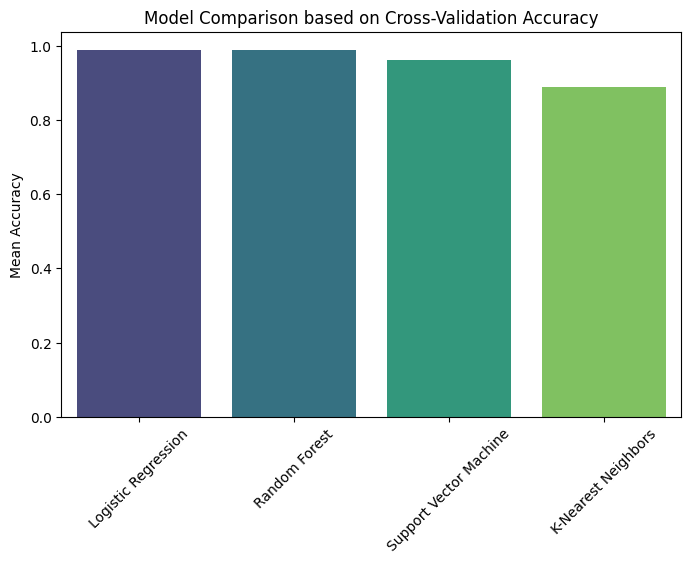

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=model_accuracies, palette='viridis')
plt.title('Model Comparison based on Cross-Validation Accuracy')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.show()


In [42]:
#Final Model Selection
# You can now manually select the best model based on the cross-validation results and classification report
Random_Forest = max(results, key=results.get)  # Get the model with the highest mean accuracy
print(f'\nBest Model: {Random_Forest}')


Best Model: Logistic Regression


In [45]:
#training the best model
x_train_transformed = preprocessor.fit_transform(x_train)
model = LogisticRegression(random_state=42)
model.fit(x_train_transformed, y_train)

LogisticRegression(random_state=42)

In [49]:
#Evaluate the model
# Predict on the test set
x_test_transformed = preprocessor.transform(x_test)
y_pred = model.predict(x_test_transformed)

In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.4f}')


Model Accuracy: 1.0000


In [51]:
# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
                                   precision    recall  f1-score   support

                        Chancroid       1.00      1.00      1.00         1
                        Chlamydia       1.00      1.00      1.00         1
                        Gonorrhea       1.00      1.00      1.00         2
Granuloma Inguinale (Donovanosis)       1.00      1.00      1.00         1
                HIV (Acute Stage)       1.00      1.00      1.00         2
                              HPV       1.00      1.00      1.00         1
   Lymphogranuloma Venereum (LGV)       1.00      1.00      1.00         3
            Molluscum Contagiosum       1.00      1.00      1.00         4
            Mycoplasma Genitalium       1.00      1.00      1.00         2
                          Scabies       1.00      1.00      1.00         1
     Shigella (Enteric Infection)       1.00      1.00      1.00         1
                   Trichomoniasis       1.00      1.00      1.00         1


In [52]:
# Confusion Matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


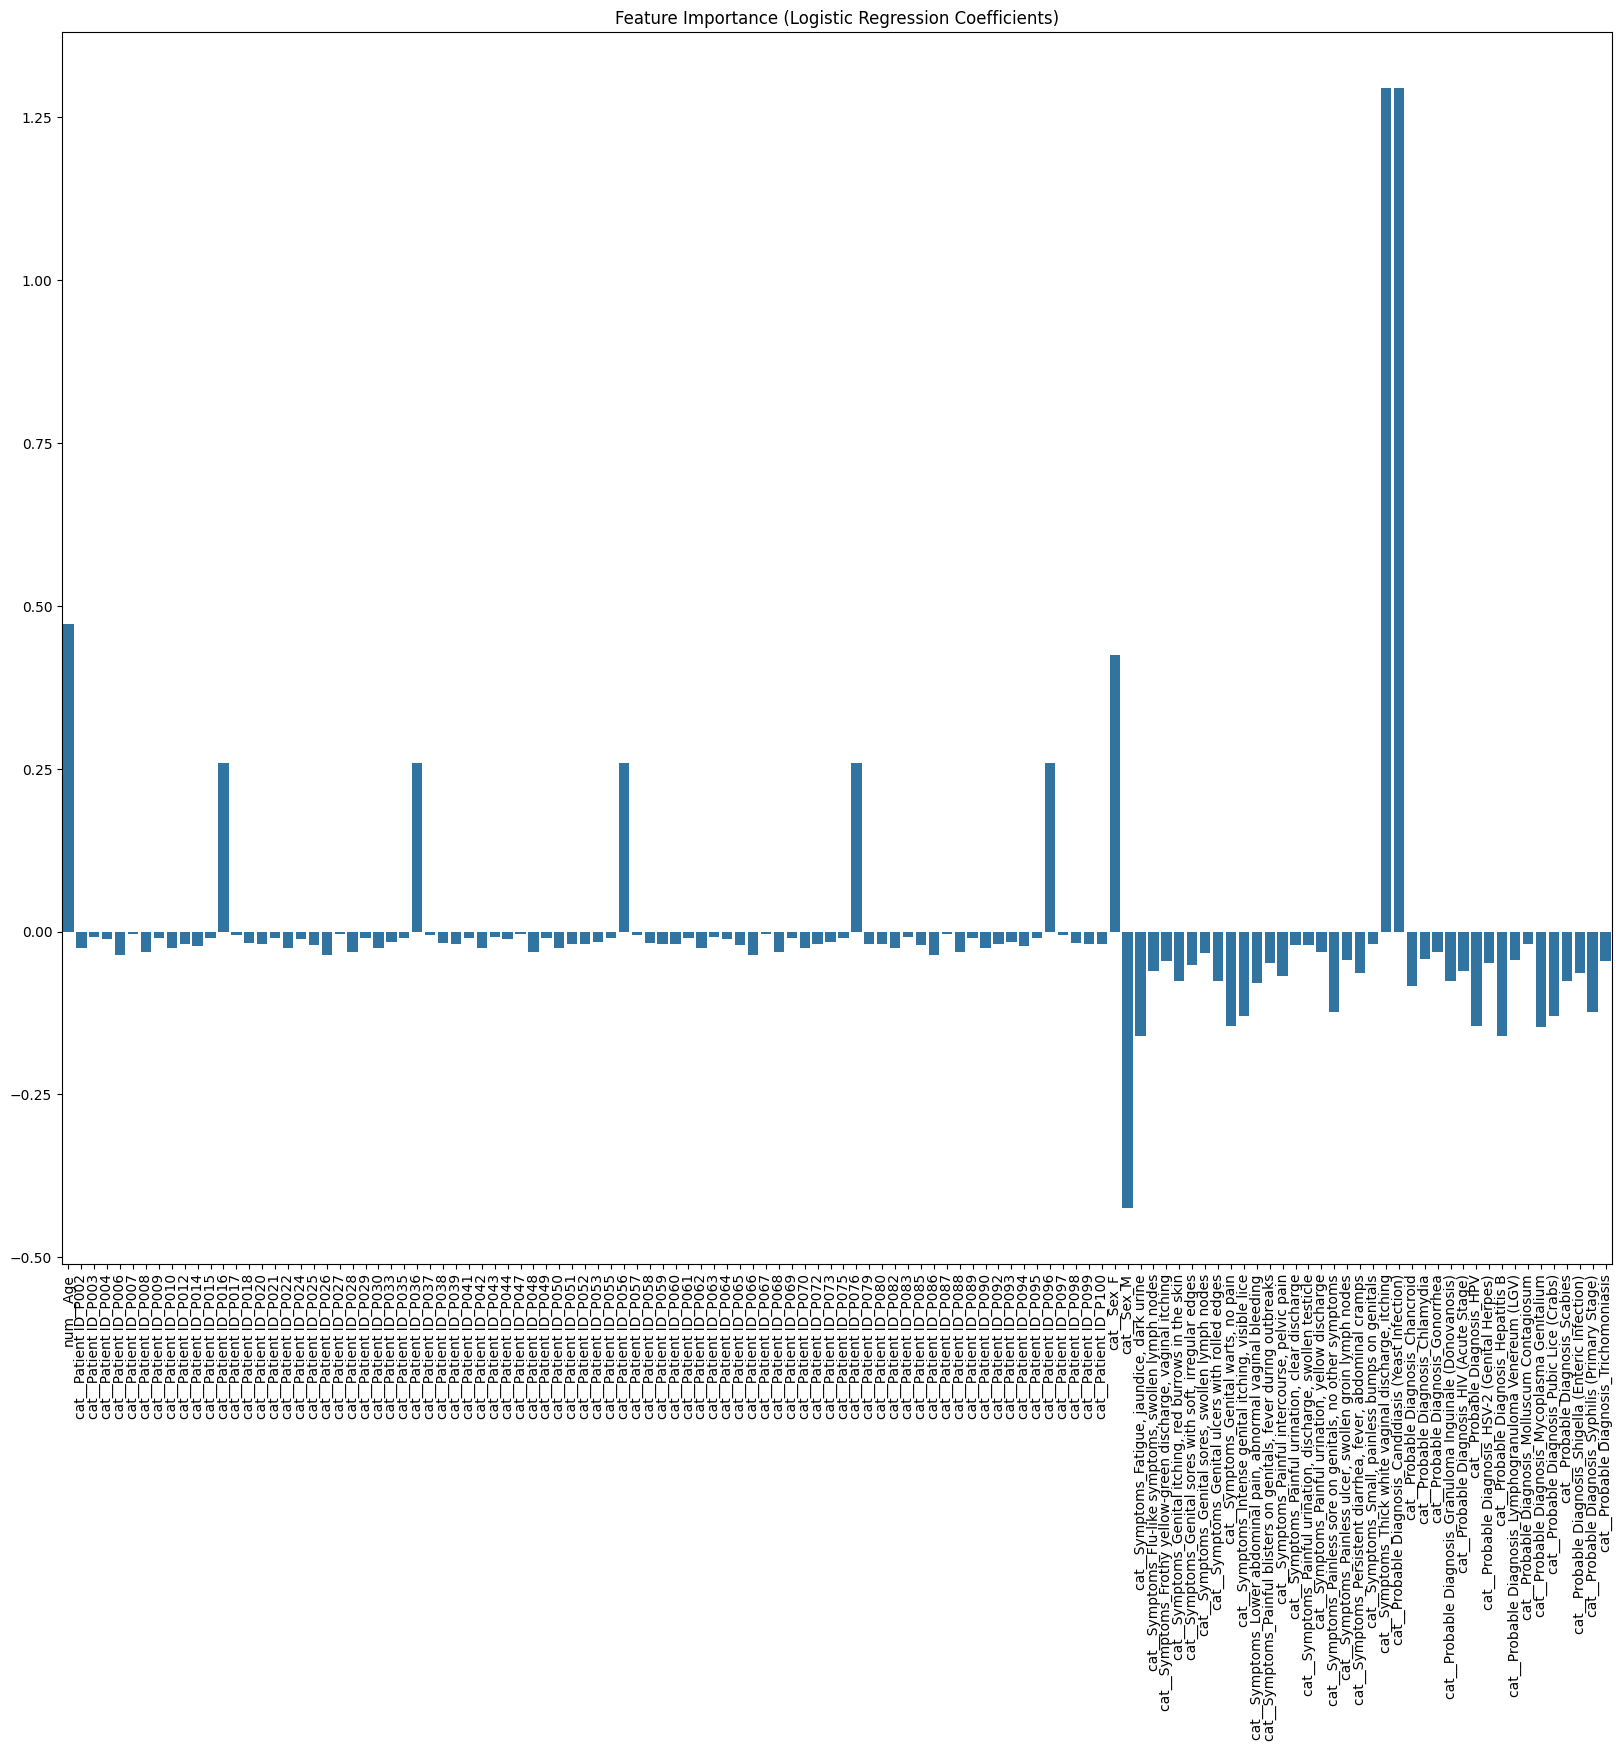

In [56]:
#Feature Importance
# For Logistic Regression, use coefficients as a proxy for feature importance
feature_importances = model.coef_[0]  # Assuming you have a single class

# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()


plt.figure(figsize=(20, 16))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=90)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

In [61]:
#Set up the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga'],  # Solvers suitable for l1 regularization
    'max_iter': [100, 200, 300],  # Number of iterations for solver
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
#Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1,  # Use all available CPU cores for faster computation
    verbose=2  # Print progress of the grid search
)


In [68]:
#Fit GridSearchCV to find the best hyperparameters
# Create a pipeline that includes the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Use the pipeline in GridSearchCV
# Update param_grid keys to access the classifier's parameters
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Penalty type
    'classifier__solver': ['liblinear', 'saga'],  # Solvers suitable for l1 regularization
    'classifier__max_iter': [100, 200, 300],  # Number of iterations for solver
    'classifier__tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}


grid_search = GridSearchCV(
    estimator=pipeline,  # Use the pipeline here
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1,  # Use all available CPU cores for faster computation
    verbose=2  # Print progress of the grid search
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Patient ID', 'Sex', 'Symptoms', 'Probable Diagnosis'], dtype='object'))])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga'],
                         'classifier__tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy', verbose=2)

In [70]:
#Best hyperparameters and best model
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_



Best Hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'classifier__tol': 0.0001}

Best Hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'classifier__tol': 0.0001}


In [58]:
import joblib

In [60]:
joblib.dump(model, 'Logistic_regression_sti_model.joblib')
print("\nModel saved as 'logistic_regression_sti_model.joblib'")


Model saved as 'logistic_regression_sti_model.joblib'
